# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1t-Q7JllEobw8YwV3wcTuMA12J9JArfwp)

![alt text](https://drive.google.com/uc?id=1pNAshUhBxksQcrTfulYmUKXUPOmWbXb0)

# TAREA # 2: IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
# Especificar el directorio del conjunto de entrenamiento

directory = 'D:\\MIA\\NLP\\Cursos Udemy\\DataScience-6casos\\data\\Dataset'

In [4]:
# Listar las carpetas de dicho directorio
os.listdir(directory)

['0', '1', '2', '3']

In [6]:
# Utilizar el generador de imágenes para generar datos de imágenes de tensores y normalizarlos
# Utilizar el 20% de los datos para la validación cruzada posterior
image_generator = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)



In [7]:
# Genere lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# El entrenamiento usará es 428 (80%) y la validación usará 104 (20%)
# Realizar muestreo aleatoria y cambio del tamaño en las imágenes
train_generator = image_generator.flow_from_directory(batch_size = 40, directory = directory, shuffle = True
                                                     , target_size = (256, 256), class_mode = 'categorical'
                                                     , subset = 'training')

Found 428 images belonging to 4 classes.


In [8]:
train_generator = image_generator.flow_from_directory(batch_size = 40, directory = directory, shuffle = True
                                                     , target_size = (256, 256), class_mode = 'categorical'
                                                     , subset = 'validation')

Found 104 images belonging to 4 classes.


In [10]:
# Generar un lote de 40 imágenes y etiquetas
train_images, train_labels = next(train_generator)

In [11]:
train_images.shape

(40, 256, 256, 3)

In [12]:
train_labels

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.]],

In [13]:
train_labels.shape

(40, 4)

In [14]:
# Traductor de cada Etiqueta
label_names = {0: 'Covid-19', 1: 'Normal', 2:'Neumonia Virica', 3: 'Neumonia bacteriana'}

# TAREA #3: VISUALIZACIÓN DEL DATASET

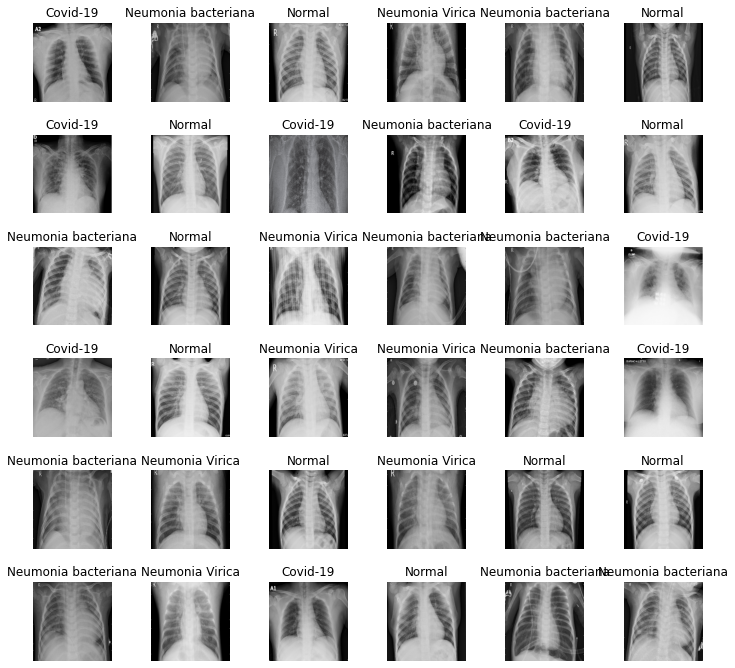

In [16]:
# Crea una matriz de 36 imágenes junto con sus etiquetas correspondientes
L = 6
W = 6

fig, axes = plt.subplots(L,W, figsize = (12,12))

axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 0.5)
    

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRAS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=1e4bFs8Fh2Bp4ueRi9Q9SASRWZ2SwShJX)

![alt text](https://drive.google.com/uc?id=1zsKnK9bQVjUt5Z38gEK3qnIoafRR6i1c)

![alt text](https://drive.google.com/uc?id=1mL13x1d9uAItMFwtV_9r-fKqQp8DjfQo)

![alt text](https://drive.google.com/uc?id=1-se5iR8RsZ4Bold3MK60hDpL0qky7H97)

# TEORÍA #5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1ypOE6WINmjunchutKTSUbx4FCzuYUyqC)

![alt text](https://drive.google.com/uc?id=16Rhq_7flyuy5oS1vEJ7p3l1Y8irU7Zwg)

![alt text](https://drive.google.com/uc?id=1hCdV7lmgADpw8jV7nf0KO3mMzIMuMZDM)

![alt text](https://drive.google.com/uc?id=1gHDvwWJBBD5d94HPpSydQLb6pjTfknrK)

# TAREA #6: IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [17]:
basemodel = ResNet50(weights = 'imagenet', include_top = False, input_tensor = Input(shape = (256,256, 3)))

94773248/94765736 [==============================] - 14s 0us/step


In [18]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
# Congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5 
for layer in basemodel.layers[:-10]:
    layer.trainable = False

# TAREA #7: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [22]:
headmodel = basemodel.output

headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)

headmodel = Flatten(name='flatten')(headmodel)

headmodel = Dense(256, activation = 'relu')(headmodel)

headmodel = Dropout(0.3)(headmodel)

headmodel = Dense(128, activation = 'relu')(headmodel)

headmodel = Dropout(0.2)(headmodel)

headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [32]:
model.compile(loss = 'categorical_crossentropy'
              , optimizer = optimizers.RMSprop(learning_rate = 1e-4, decay = 1e-6)
              , metrics = ['accuracy'])

In [25]:
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)

earlystopping = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)
# Almacenar el mejor modelo con la menor pérdida en la validación

checkpointer = ModelCheckpoint(filepath = "weights.hdf5", verbose = 1, save_best_only = True)

In [28]:
train_generator = image_generator.flow_from_directory(batch_size = 4
                                                      , directory = directory
                                                      , shuffle = True
                                                      , target_size = (256, 256)
                                                      , class_mode = 'categorical'
                                                      , subset='training')
val_generator = image_generator.flow_from_directory(batch_size = 4
                                                      , directory = directory
                                                      , shuffle = True
                                                      , target_size = (256, 256)
                                                      , class_mode = 'categorical'
                                                       , subset = 'validation')

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [34]:
history = model.fit_generator(train_generator
                              , steps_per_epoch = train_generator.n//4
                              , epochs = 25
                              , validation_data = val_generator
                              , validation_steps = val_generator.n//4
                             , callbacks = [checkpointer, earlystopping])

Epoch 1/25
107/107 [==============================] - 11s 105ms/step - loss: 0.5043 - accuracy: 0.8061 - val_loss: 0.5978 - val_accuracy: 0.8269

Epoch 00001: val_loss improved from 0.60790 to 0.59783, saving model to weights.hdf5
Epoch 2/25
107/107 [==============================] - 11s 103ms/step - loss: 0.4799 - accuracy: 0.8294 - val_loss: 0.9807 - val_accuracy: 0.7115

Epoch 00002: val_loss did not improve from 0.59783
Epoch 3/25
107/107 [==============================] - 11s 105ms/step - loss: 0.4847 - accuracy: 0.8201 - val_loss: 0.8446 - val_accuracy: 0.7404

Epoch 00003: val_loss did not improve from 0.59783
Epoch 4/25
107/107 [==============================] - 14s 128ms/step - loss: 0.4769 - accuracy: 0.8224 - val_loss: 0.7694 - val_accuracy: 0.7981

Epoch 00004: val_loss did not improve from 0.59783
Epoch 5/25
107/107 [==============================] - 12s 109ms/step - loss: 0.4321 - accuracy: 0.8435 - val_loss: 0.6743 - val_accuracy: 0.7692

Epoch 00005: val_loss did not im

# TAREA #8: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

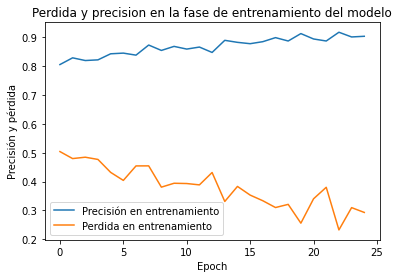

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

plt.title('Perdida y precision en la fase de entrenamiento del modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión y pérdida')
plt.legend(['Precisión en entrenamiento', 'Perdida en entrenamiento'])

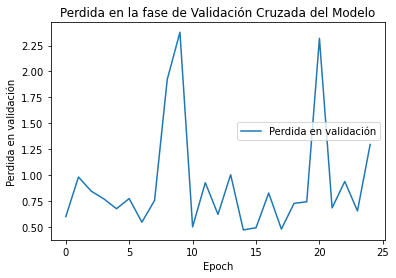

In [40]:
plt.plot(history.history['val_loss'])

plt.title('Perdida en la fase de Validación Cruzada del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Perdida en validación')
plt.legend(['Perdida en validación'])

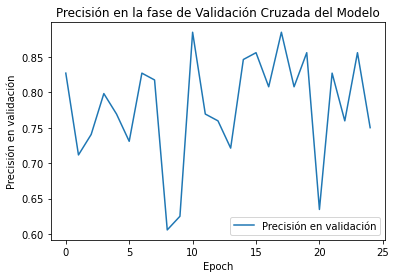

In [41]:
plt.plot(history.history['val_accuracy'])

plt.title('Precisión en la fase de Validación Cruzada del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión en validación')
plt.legend(['Precisión en validación'])

In [42]:
test_directory = 'D:\\MIA\\NLP\\Cursos Udemy\\DataScience-6casos\\data\\Test'

In [43]:
image_generator = ImageDataGenerator(rescale = 1./255)

In [48]:
eval_gemerator = image_generator.flow_from_directory(directory = test_directory, shuffle = True
                                                     , target_size = (256, 256), class_mode = 'categorical')

Found 40 images belonging to 4 classes.


In [59]:
evaluate = model.evaluate_generator(eval_gemerator, steps = eval_gemerator.n//4, verbose = 1)

print("Precisión en la fase de Test : {}".format(evaluate[1]))


C:\Users\angel\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


10/10 [==============================] - 1s 20ms/step - loss: 1.8508 - accuracy: 0.6500
Precisión en la fase de Test : 0.6499999761581421


In [63]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

prediction = []

original = []

image = []

for i in range(len(os.listdir(test_directory))):
    for item in os.listdir(os.path.join(test_directory, str(i))):
        img = cv2.imread(os.path.join(test_directory, str(i), item))
        img = cv2.resize(img, (256, 256))
        image.append(img)
        img = img/255
        img = img.reshape(-1, 256, 256, 3)
        predict = model.predict(img)
        predict = np.argmax(predict)
        prediction.append(predict)
        original.append(i)
        

In [67]:
score = accuracy_score(original, prediction)
print('Eficacia de la predicción {}'.format(score))

Eficacia de la predicción 0.65


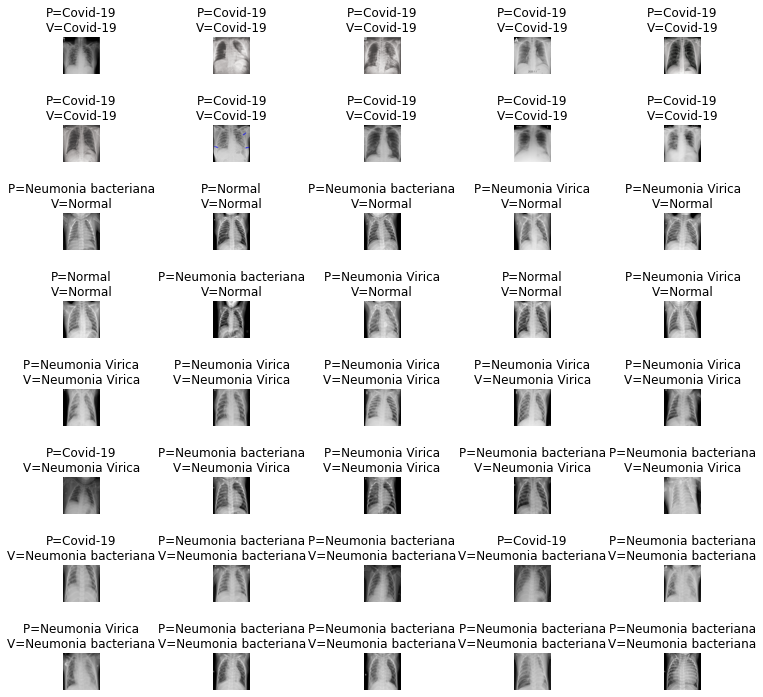

In [78]:
L = 8
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))

axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(image[i])
    axes[i].set_title('P={}\nV={}'.format(str(label_names[prediction[i]]), str(label_names[original[i]])))
    axes[i].axis('off')
plt.subplots_adjust(wspace = 1.2, hspace = 1.4)

In [79]:
print(classification_report(np.asarray(original), np.asarray(prediction)))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       1.00      0.30      0.46        10
           2       0.55      0.60      0.57        10
           3       0.54      0.70      0.61        10

    accuracy                           0.65        40
   macro avg       0.71      0.65      0.63        40
weighted avg       0.71      0.65      0.63        40



Text(0.5, 1.0, 'Matriz de confusión')

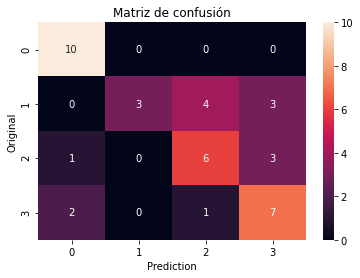

In [82]:
cm = confusion_matrix(np.asarray(original), np.asarray(prediction))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax)
ax.set_xlabel('Prediction')
ax.set_ylabel('Original')
ax.set_title("Matriz de confusión")

# BUEN TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS NUEVAS HABILIDADES ADQUIRIDAS
